In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
coaches = pd.read_csv('combined.csv')

In [354]:
ly=coaches.groupby(['name','level']).agg({'year':'count'})

In [355]:
ly_piv=ly.reset_index().pivot(index = 'name',columns = 'level',values='year')[['Coordinator','Head','Positional']]

In [360]:
level_record = coaches[['name','level']].drop_duplicates()
level_record_only = (coaches.groupby(['name','level']).agg(sum).win/
                      (coaches.groupby(['name','level']).agg(sum).win + 
                       coaches.groupby(['name','level']).agg(sum).loss)).to_frame(name='wl')
lp = pd.merge(level_record,level_record_only,how='left',on = ['name','level'])

In [361]:
lp_pivot = lp.pivot(index='name',columns='level',values='wl')[['Coordinator','Head','Positional']]

In [364]:
lyp = pd.merge(ly,lp,how='inner',on = ['name','level'])

In [349]:
lyp_piv = lyp.pivot(index = 'name', columns = 'level')

In [379]:
by_year = coaches['year'].drop_duplicates().reset_index()

In [381]:
by_year.drop(columns=['index'],inplace = True)

In [382]:
by_year['avg coaches'] = coaches.groupby('year').agg({'name':'count'}).name/coaches.groupby('year').agg({'team':'nunique'}).team

In [397]:
byyr = (coaches.groupby(['year','phase']).agg({'name':'count'}).name/coaches.groupby('year').agg({'team':'nunique'}).team).to_frame(name='avg coaches').reset_index()

In [406]:
byyr_piv = byyr.pivot(index='year',columns = 'phase')['avg coaches'][['Defense','Offense','Special Teams']]

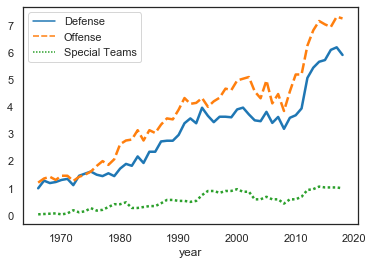

In [408]:
sns.lineplot(data=byyr_piv, palette="tab10", linewidth=2.5)

In [370]:
lyp.groupby('level').agg({'year':['mean','median'],'wl':['mean','median']})

year               wl          
                 mean median      mean    median
level                                           
Coordinator  3.781046      2  0.488311  0.490385
Head         5.017893      3  0.453972  0.468354
Positional   5.923874      4  0.481948  0.488543

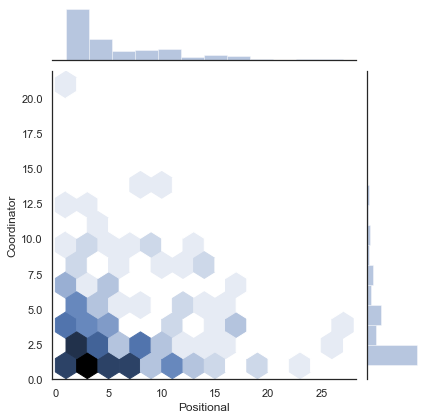

In [356]:
sns.jointplot(x='Positional', y='Coordinator', data= ly_piv, kind = 'hexa')

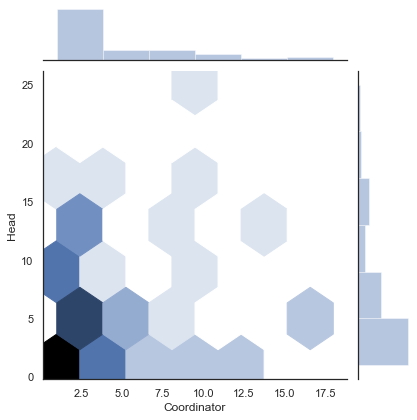

In [357]:
sns.jointplot(x='Coordinator', y='Head', data= ly_piv, kind = 'hexa')

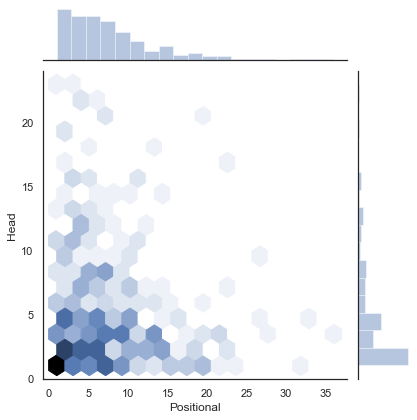

In [358]:
sns.jointplot(x='Positional', y='Head', data= ly_piv, kind = 'hexa')

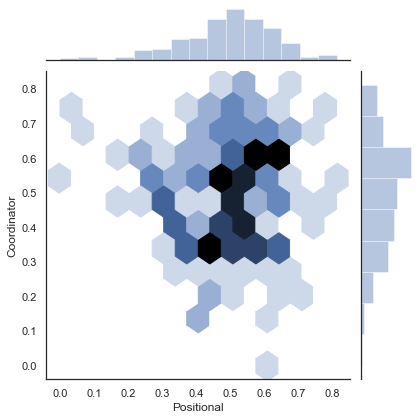

In [362]:
sns.jointplot(x='Positional', y='Coordinator', data= lp_pivot,kind = 'hexa')

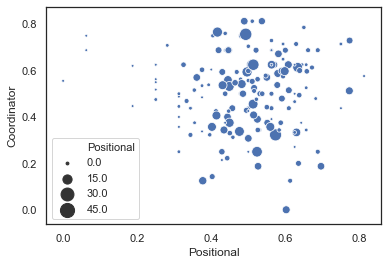

In [371]:
sns.scatterplot(size=lyp_piv.year.Positional, y=lyp_piv.wl.Coordinator,x = lyp_piv.wl.Positional, sizes = (8,200))

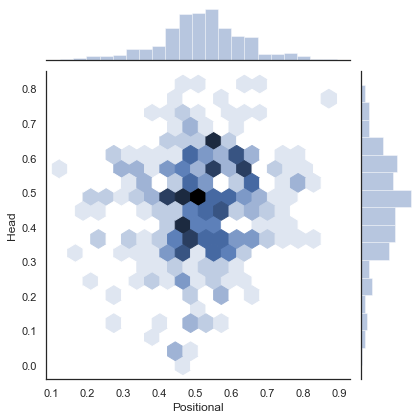

In [363]:
sns.jointplot(x='Positional', y='Head', data= lp_pivot,kind = 'hexa')